In [1]:
import pandas as pd
import numpy as np
import os

## data cleaning first  9cols

In [2]:
df = pd.read_csv('../data/Rawdata.csv', encoding='latin-1')
print(df['MEDIA16'].value_counts())
selected_cols = ['HR5', 'HR6', 'HR13', 'HR14', 'STIMULUS1', 'STIMULUS2', 'STIMULUS5', 'POLICY1', 'POLICY2']
df = df[selected_cols]
df.info()

MEDIA16
No, have not sought food assistance                                                                                                                                                                     563
Yes, from a food bank                                                                                                                                                                                    96
Yes, from the food stamps program/EBT                                                                                                                                                                    91
Don't know                                                                                                                                                                                               58
Yes, from a soup kitchen                                                                                                                                                        

In [3]:
for col in df.columns:
    print(df[col].value_counts())
    print('==================')

HR5
Very satisfied           422
Somewhat satisfied       417
Somewhat dissatisfied    158
Very dissatisfied        145
No opinion                69
Name: count, dtype: int64
HR6
Poor          325
Good          308
Fair          268
Excellent     256
No opinion     54
Name: count, dtype: int64
HR13
No                                                                               586
Yes, somebody close to me lost their health insurance due to losing their job    218
Yes, I lost my health insurance due to losing my job                             155
Yes, I lost my health insurance for other reasons                                112
Unsure                                                                            79
Yes, somebody close to me lost their health insurance for other reasons           61
Name: count, dtype: int64
HR14
Private health insurance plan sponsored through an employer (your own or your spouse's or parent's plan)                                     427
Private health

In [4]:
df_encoded = pd.get_dummies(df, columns=['HR5', 'HR6', 'HR13', 'HR14', 'STIMULUS2', 'POLICY1', 'POLICY2'], dtype=int)

stimulus1_options = [
    "Work from home",
    "Lost job",
    "Furloughed",
    "Reduced hours",
    "Pay cut",
    "Work more hours",
    "Increased pay (i.e., from working overtime/hazard pay)",
    "Nothing changed (i.e., was retired; already worked from home, etc)"
]

stimulus5_options = [
    "Yes, check from the government",
    "Yes, small business loan",
    "Yes, unemployment benefits",
    "No",
    "Unsure",
    "Other, specify"
]

for option in stimulus1_options:
    col_name = "STIMULUS1_" + option
    df_encoded[col_name] = df_encoded["STIMULUS1"].apply(lambda x: 1 if pd.notna(x) and option in x else 0)


for option in stimulus5_options:
    col_name = "STIMULUS5_" + option
    df_encoded[col_name] = df_encoded["STIMULUS5"].apply(lambda x: 1 if pd.notna(x) and option in x else 0)


df_encoded.drop(["STIMULUS1", "STIMULUS5"], axis=1, inplace=True)
df_encoded

,HR5_No opinion,HR5_Somewhat dissatisfied,HR5_Somewhat satisfied,HR5_Very dissatisfied,HR5_Very satisfied,HR6_Excellent,HR6_Fair,HR6_Good,HR6_No opinion,HR6_Poor,...,STIMULUS1_Pay cut,STIMULUS1_Work more hours,"STIMULUS1_Increased pay (i.e., from working overtime/hazard pay)","STIMULUS1_Nothing changed (i.e., was retired; already worked from home, etc)","STIMULUS5_Yes, check from the government","STIMULUS5_Yes, small business loan","STIMULUS5_Yes, unemployment benefits",STIMULUS5_No,STIMULUS5_Unsure,"STIMULUS5_Other, specify"
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1207,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1208,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1209,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
# # 1) HR5: satisfaction with affordability
# # ordering
# hr5_map = {
#     "Very dissatisfied": 1,
#     "Somewhat dissatisfied": 2,
#     "Somewhat satisfied": 3,
#     "Very satisfied": 4
# }
# df["HR5_ordered"] = df["HR5"].map(hr5_map)
# df.loc[df["HR5"] == "No opinion", "HR5_ordered"] = np.nan

# # 2) HR6: rating of affordability in country as a whole
# # ordering
# hr6_map = {
#     "Poor": 1,
#     "Fair": 2,
#     "Good": 3,
#     "Excellent": 4
# }
# df["HR6_ordered"] = df["HR6"].map(hr6_map)
# df.loc[df["HR6"] == "No opinion", "HR6_ordered"] = np.nan

# # 3) HR13: lost health insurance?
# df["HR13_self_lost_job"] = df["HR13"].eq("Yes, I lost my health insurance due to losing my job").astype(int)
# df["HR13_self_lost_other"] = df["HR13"].eq("Yes, I lost my health insurance for other reasons").astype(int)
# df["HR13_close_lost_job"] = df["HR13"].eq("Yes, somebody close to me lost their health insurance due to losing their job").astype(int)
# df["HR13_close_lost_other"] = df["HR13"].eq("Yes, somebody close to me lost their health insurance for other reasons").astype(int)
# df["HR13_no"] = df["HR13"].eq("No").astype(int)
# df["HR13_unsure"] = df["HR13"].eq("Unsure").astype(int)

# # 4) HR14: current primary source of health insurance
# def clean_hr14(x):
#     if pd.isna(x):
#         return np.nan
#     x = x.strip().lower()
#     if x.startswith("private health insurance plan sponsored through an employer"):
#         return "employer"
#     elif "purchase on the individual marketplace with a subsidy" in x:
#         return "indiv_subsidy"
#     elif "purchase on the individual marketplace with no subsidy" in x:
#         return "indiv_nosubsidy"
#     elif x.startswith("none, uninsured"):
#         return "uninsured"
#     elif x.startswith("medicaid"):
#         return "medicaid"
#     elif x.startswith("medicare"):
#         return "medicare"
#     elif x.startswith("veteran"):
#         return "va_tricare"
#     else:
#         return "other"

# df["HR14_clean"] = df["HR14"].apply(clean_hr14)

# # 5) STIMULUS1: work change since covid


# # 6) STIMULUS2: layoff since covid
# df["STIMULUS2_immediate_family"] = df["STIMULUS2"].eq("Yes, someone in my immediate family").astype(int)
# df["STIMULUS2_someone_close"] = df["STIMULUS2"].eq("Yes, somebody close to me").astype(int)
# df["STIMULUS2_no"] = df["STIMULUS2"].eq("No").astype(int)

# # 7) STIMULUS5: any personal benefits


# # 8) POLICY1: social distancing effect on economic standpoint
# policy1_map = {
#     "Not at all- has not affected my finances personally": 0,
#     "A little ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï": 1,
#     "A lot- lost significant income as a consequence": 2
# }
# df["POLICY1_ordered"] = df["POLICY1"].map(policy1_map)

# # 9) POLICY2: how concerned if social distancing continued
# policy2_map = {
#     "Not at all concerned": 0,
#     "Somewhat concerned": 1,
#     "Very concerned": 2
# }
# df["POLICY2_ordered"] = df["POLICY2"].map(policy2_map)

# # df_encoded = pd.get_dummies(df, columns=["HR5", "HR6", "HR14_clean", "POLICY1", "POLICY2"], dummy_na=False)

In [6]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 48 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype
---  ------                                                                                                                                          --------------  -----
 0   HR5_No opinion                                                                                                                                  1211 non-null   int64
 1   HR5_Somewhat dissatisfied                                                                                                                       1211 non-null   int64
 2   HR5_Somewhat satisfied                                                                                                                          1211 non-null   int64
 3   HR5_Very dissatisfied            

In [7]:
for col in df_encoded.columns:
    print(df_encoded[col].value_counts())
    print('==================')

HR5_No opinion
0    1142
1      69
Name: count, dtype: int64
HR5_Somewhat dissatisfied
0    1053
1     158
Name: count, dtype: int64
HR5_Somewhat satisfied
0    794
1    417
Name: count, dtype: int64
HR5_Very dissatisfied
0    1066
1     145
Name: count, dtype: int64
HR5_Very satisfied
0    789
1    422
Name: count, dtype: int64
HR6_Excellent
0    955
1    256
Name: count, dtype: int64
HR6_Fair
0    943
1    268
Name: count, dtype: int64
HR6_Good
0    903
1    308
Name: count, dtype: int64
HR6_No opinion
0    1157
1      54
Name: count, dtype: int64
HR6_Poor
0    886
1    325
Name: count, dtype: int64
HR13_No
0    625
1    586
Name: count, dtype: int64
HR13_Unsure
0    1132
1      79
Name: count, dtype: int64
HR13_Yes, I lost my health insurance due to losing my job
0    1056
1     155
Name: count, dtype: int64
HR13_Yes, I lost my health insurance for other reasons
0    1099
1     112
Name: count, dtype: int64
HR13_Yes, somebody close to me lost their health insurance due to losing the

In [ ]:
# df_encoded.to_csv('../data/first_half_ohe.csv', index=False)
# df_encoded

## edit vedkia one hot encode

In [10]:
df2 = pd.read_csv('../data/second_half_ohe.csv')
df2.columns.tolist()

['DEMOGRAPHIC13_Lower class/poor',
 'DEMOGRAPHIC13_Lower middle class',
 'DEMOGRAPHIC13_Middle class',
 'DEMOGRAPHIC13_Upper class/wealthy',
 'DEMOGRAPHIC13_Upper middle class',
 'DEMOGRAPHIC11_$10,001-$20,000',
 'DEMOGRAPHIC11_$150,001-$200,000',
 'DEMOGRAPHIC11_$20,001-$50,000',
 'DEMOGRAPHIC11_$250,001+',
 'DEMOGRAPHIC11_$50,001-$75,000',
 'DEMOGRAPHIC11_$75,001-$150,000',
 'DEMOGRAPHIC11_< $10,000',
 'DEMOGRAPHIC11_>$201,000-250,000',
 'DEMOGRAPHIC7_No',
 'DEMOGRAPHIC7_Yes',
 'DEMOGRAPHIC3_1924',
 'DEMOGRAPHIC3_1926',
 'DEMOGRAPHIC3_1927',
 'DEMOGRAPHIC3_1930',
 'DEMOGRAPHIC3_1931',
 'DEMOGRAPHIC3_1934',
 'DEMOGRAPHIC3_1935',
 'DEMOGRAPHIC3_1936',
 'DEMOGRAPHIC3_1938',
 'DEMOGRAPHIC3_1939',
 'DEMOGRAPHIC3_1940',
 'DEMOGRAPHIC3_1941',
 'DEMOGRAPHIC3_1942',
 'DEMOGRAPHIC3_1943',
 'DEMOGRAPHIC3_1944',
 'DEMOGRAPHIC3_1945',
 'DEMOGRAPHIC3_1946',
 'DEMOGRAPHIC3_1947',
 'DEMOGRAPHIC3_1948',
 'DEMOGRAPHIC3_1949',
 'DEMOGRAPHIC3_1950',
 'DEMOGRAPHIC3_1951',
 'DEMOGRAPHIC3_1952',
 'DEMOGRAP

### edit demographic3

In [11]:
original = pd.read_csv('../data/Rawdata.csv', encoding='latin-1')
original['DEMOGRAPHIC3'].sort_values()


750     1924
364     1926
879     1927
64      1930
630     1931
        ... 
384     2006
1011    2007
793     2007
481     2008
639     2010
Name: DEMOGRAPHIC3, Length: 1211, dtype: int64

In [12]:
age_group = {
            'child': (0, 12),
             'teenager': (13, 19),
             'young_adult': (20, 25),
             'adult': (26, 39),
             'middle_age': (40, 65),
             'senior': (66, 100)
             } 
inverted = {value: key for key, value in age_group.items()}

groups = []

for id, row in original.iterrows():
    age = 2021 - row['DEMOGRAPHIC3']
    print(age)
    for lower, upper in age_group.values():
        # print(lower, upper)
        if lower <= age <= upper:
            age_range = (lower, upper)
            designated_group = inverted[age_range]
    groups.append(designated_group)
    print(designated_group)

print(groups)
    

25
young_adult
24
young_adult
28
adult
52
middle_age
38
adult
34
adult
42
middle_age
50
middle_age
47
middle_age
36
adult
28
adult
41
middle_age
40
middle_age
29
adult
30
adult
43
middle_age
42
middle_age
54
middle_age
28
adult
20
young_adult
62
middle_age
27
adult
35
adult
26
adult
32
adult
36
adult
24
young_adult
38
adult
31
adult
59
middle_age
25
young_adult
31
adult
42
middle_age
41
middle_age
60
middle_age
43
middle_age
40
middle_age
44
middle_age
47
middle_age
27
adult
46
middle_age
26
adult
73
senior
26
adult
26
adult
47
middle_age
68
senior
40
middle_age
48
middle_age
30
adult
19
teenager
46
middle_age
68
senior
28
adult
34
adult
48
middle_age
49
middle_age
77
senior
22
young_adult
36
adult
62
middle_age
44
middle_age
68
senior
63
middle_age
91
senior
21
young_adult
28
adult
46
middle_age
29
adult
49
middle_age
54
middle_age
41
middle_age
42
middle_age
50
middle_age
33
adult
36
adult
40
middle_age
41
middle_age
53
middle_age
36
adult
57
middle_age
62
middle_age
36
adult
46
midd

In [13]:
original['DEMOGRAPHIC3'] = groups
demo3_ohe = pd.get_dummies(original, columns=['DEMOGRAPHIC3'], dtype=int)
df_encoded = pd.concat([df_encoded, demo3_ohe.iloc[:, -6:]], axis=1)
df_encoded

,HR5_No opinion,HR5_Somewhat dissatisfied,HR5_Somewhat satisfied,HR5_Very dissatisfied,HR5_Very satisfied,HR6_Excellent,HR6_Fair,HR6_Good,HR6_No opinion,HR6_Poor,...,"STIMULUS5_Yes, unemployment benefits",STIMULUS5_No,STIMULUS5_Unsure,"STIMULUS5_Other, specify",DEMOGRAPHIC3_adult,DEMOGRAPHIC3_child,DEMOGRAPHIC3_middle_age,DEMOGRAPHIC3_senior,DEMOGRAPHIC3_teenager,DEMOGRAPHIC3_young_adult
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1207,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1208,0,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
1209,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
final_df = pd.concat([df_encoded, df2[df2.columns.drop(list(df2.filter(regex='DEMOGRAPHIC3')))]], axis=1)
final_df = final_df.astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 83 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype
---  ------                                                                                                                                          --------------  -----
 0   HR5_No opinion                                                                                                                                  1211 non-null   int64
 1   HR5_Somewhat dissatisfied                                                                                                                       1211 non-null   int64
 2   HR5_Somewhat satisfied                                                                                                                          1211 non-null   int64
 3   HR5_Very dissatisfied            

In [15]:
for col in final_df.columns:
    print(final_df[col].value_counts())
    print('==================')

HR5_No opinion
0    1142
1      69
Name: count, dtype: int64
HR5_Somewhat dissatisfied
0    1053
1     158
Name: count, dtype: int64
HR5_Somewhat satisfied
0    794
1    417
Name: count, dtype: int64
HR5_Very dissatisfied
0    1066
1     145
Name: count, dtype: int64
HR5_Very satisfied
0    789
1    422
Name: count, dtype: int64
HR6_Excellent
0    955
1    256
Name: count, dtype: int64
HR6_Fair
0    943
1    268
Name: count, dtype: int64
HR6_Good
0    903
1    308
Name: count, dtype: int64
HR6_No opinion
0    1157
1      54
Name: count, dtype: int64
HR6_Poor
0    886
1    325
Name: count, dtype: int64
HR13_No
0    625
1    586
Name: count, dtype: int64
HR13_Unsure
0    1132
1      79
Name: count, dtype: int64
HR13_Yes, I lost my health insurance due to losing my job
0    1056
1     155
Name: count, dtype: int64
HR13_Yes, I lost my health insurance for other reasons
0    1099
1     112
Name: count, dtype: int64
HR13_Yes, somebody close to me lost their health insurance due to losing the

### edit media16_dont know

In [16]:
original['MEDIA16'].value_counts()

MEDIA16
No, have not sought food assistance                                                                                                                                                                     563
Yes, from a food bank                                                                                                                                                                                    96
Yes, from the food stamps program/EBT                                                                                                                                                                    91
Don't know                                                                                                                                                                                               58
Yes, from a soup kitchen                                                                                                                                                        

In [17]:
media16_options = [
    "Yes, from a soup kitchen",
    "Yes, from a school district",
    "Yes, from a food bank",
    "Yes, from the food stamps program/EBT",
    "Yes, from a community food distribution program",
    "No, have not sought food assistance",
    "Don't know",
]


for option in media16_options:
    col_name = "MEDIA16_" + option
    original[col_name] = original["MEDIA16"].apply(lambda x: 1 if pd.notna(x) and option in x else 0)

original.drop(["MEDIA16"], axis=1, inplace=True)
original

,STARTDATE,ENDDATE,PROGRESS,DURATION,FINISHED,RECORDEDDATE,DISTRIBUTIONCHANNEL,USERLANGUAGE,ARM,CONSENT,...,DEMOGRAPHIC11,DEMOGRAPHIC12,DEMOGRAPHIC13,"MEDIA16_Yes, from a soup kitchen","MEDIA16_Yes, from a school district","MEDIA16_Yes, from a food bank","MEDIA16_Yes, from the food stamps program/EBT","MEDIA16_Yes, from a community food distribution program","MEDIA16_No, have not sought food assistance",MEDIA16_Don't know
0,6/3/2020 13:05,6/3/2020 13:11,100,370,True,6/3/2020 13:11,anonymous,EN,1,"Yes, I consent.",...,"$20,001-$50,000",White,Lower middle class,0,0,0,1,0,0,0
1,6/3/2020 13:06,6/3/2020 13:13,100,447,True,6/3/2020 13:13,anonymous,EN,0,"Yes, I consent.",...,"$10,001-$20,000",White,Lower middle class,0,0,0,0,0,1,1
2,6/3/2020 13:07,6/3/2020 13:15,100,478,True,6/3/2020 13:15,anonymous,EN,2,"Yes, I consent.",...,"< $10,000",White,Lower class/poor,0,0,0,0,0,0,1
3,6/3/2020 13:05,6/3/2020 13:15,100,605,True,6/3/2020 13:15,anonymous,EN,2,"Yes, I consent.",...,"$20,001-$50,000",White,Lower class/poor,0,1,0,0,0,0,0
4,6/3/2020 13:11,6/3/2020 13:16,100,275,True,6/3/2020 13:16,anonymous,EN,1,"Yes, I consent.",...,"< $10,000",White,Lower class/poor,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,6/8/2020 18:47,6/8/2020 18:54,100,448,True,6/8/2020 18:54,anonymous,EN,0,"Yes, I consent.",...,"$10,001-$20,000",Black or African American,Lower class/poor,0,0,0,0,0,0,1
1207,6/8/2020 18:50,6/8/2020 18:55,100,300,True,6/8/2020 18:55,anonymous,EN,0,"Yes, I consent.",...,"$10,001-$20,000",Black or African American,Upper class/wealthy,0,0,1,0,0,0,0
1208,6/8/2020 18:45,6/8/2020 18:56,100,680,True,6/8/2020 18:56,anonymous,EN,0,"Yes, I consent.",...,"$10,001-$20,000",White,Lower middle class,0,0,1,0,0,1,0
1209,6/8/2020 18:49,6/8/2020 18:59,100,585,True,6/8/2020 18:59,anonymous,EN,0,"Yes, I consent.",...,"$50,001-$75,000",Black or African American,Lower class/poor,0,0,0,0,0,1,0


In [18]:
original.iloc[:, -7:]

,"MEDIA16_Yes, from a soup kitchen","MEDIA16_Yes, from a school district","MEDIA16_Yes, from a food bank","MEDIA16_Yes, from the food stamps program/EBT","MEDIA16_Yes, from a community food distribution program","MEDIA16_No, have not sought food assistance",MEDIA16_Don't know
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,1
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0
4,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...
1206,0,0,0,0,0,0,1
1207,0,0,1,0,0,0,0
1208,0,0,1,0,0,1,0
1209,0,0,0,0,0,1,0


In [19]:
final_df2 = pd.concat([final_df[final_df.columns.drop(list(final_df.filter(regex='MEDIA16')))], original.iloc[:, -7:]], axis=1)
final_df2

,HR5_No opinion,HR5_Somewhat dissatisfied,HR5_Somewhat satisfied,HR5_Very dissatisfied,HR5_Very satisfied,HR6_Excellent,HR6_Fair,HR6_Good,HR6_No opinion,HR6_Poor,...,CHILDCARE1_Yes,MEDIA17_No,MEDIA17_Yes,"MEDIA16_Yes, from a soup kitchen","MEDIA16_Yes, from a school district","MEDIA16_Yes, from a food bank","MEDIA16_Yes, from the food stamps program/EBT","MEDIA16_Yes, from a community food distribution program","MEDIA16_No, have not sought food assistance",MEDIA16_Don't know
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1207,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1208,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1209,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
# final_df2.to_csv('../data/final_df.csv', index=False)

In [26]:
final_df3 = pd.concat([final_df2, original['POLICY3'].rename('POLICY3_target')], axis=1)
final_df3

,HR5_No opinion,HR5_Somewhat dissatisfied,HR5_Somewhat satisfied,HR5_Very dissatisfied,HR5_Very satisfied,HR6_Excellent,HR6_Fair,HR6_Good,HR6_No opinion,HR6_Poor,...,MEDIA17_No,MEDIA17_Yes,"MEDIA16_Yes, from a soup kitchen","MEDIA16_Yes, from a school district","MEDIA16_Yes, from a food bank","MEDIA16_Yes, from the food stamps program/EBT","MEDIA16_Yes, from a community food distribution program","MEDIA16_No, have not sought food assistance",MEDIA16_Don't know,POLICY3_target
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,Coronavirus is a serious illness and we should...
1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,This is all an overreaction. The disease is no...
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,The disease is a large threat to the health of...
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,This is all an overreaction. The disease is no...
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,This is all an overreaction. The disease is no...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,The disease is a large threat to the health of...
1207,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,This is all an overreaction. The disease is no...
1208,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,This is all an overreaction. The disease is no...
1209,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,The disease is a large threat to the health of...


In [ ]:
# final_df3.to_csv('../data/final_df_with_target.csv', index=False)

## attempt mca

In [199]:
# !pip install prince
import prince

In [200]:
final_df2[final_df2.isnull().any(axis=1)]

,HR5_No opinion,HR5_Somewhat dissatisfied,HR5_Somewhat satisfied,HR5_Very dissatisfied,HR5_Very satisfied,HR6_Excellent,HR6_Fair,HR6_Good,HR6_No opinion,HR6_Poor,...,CHILDCARE1_Yes,MEDIA17_No,MEDIA17_Yes,"MEDIA16_Yes, from a soup kitchen","MEDIA16_Yes, from a school district","MEDIA16_Yes, from a food bank","MEDIA16_Yes, from the food stamps program/EBT","MEDIA16_Yes, from a community food distribution program","MEDIA16_No, have not sought food assistance",MEDIA16_Don't know


In [235]:
mca = prince.MCA(random_state=42, one_hot=False)
mca = mca.fit(final_df2)

In [236]:
mca_without_correction = prince.MCA(correction=None)
mca_with_benzecri_correction = prince.MCA(correction='benzecri')
mca_with_greenacre_correction = prince.MCA(correction='greenacre')

In [237]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.311,9.04%,9.04%
1,0.143,4.16%,13.20%


In [238]:
mca.row_coordinates(final_df2).head()

,0,1
0,-0.074315,0.394016
1,-0.342624,0.619044
2,-0.906856,1.845733
3,0.033817,0.383684
4,-0.143529,0.628560


In [239]:
mca.column_coordinates(final_df2).head()

,0,1
HR5_No opinion,-1.154930,2.074998
HR5_Somewhat dissatisfied,-0.337063,0.164761
HR5_Somewhat satisfied,-0.027762,-0.140241
HR5_Very dissatisfied,-0.685384,0.090417
HR5_Very satisfied,0.465520,-0.314030


In [240]:
mca.plot(
    final_df2,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)

alt.LayerChart(...)

In [241]:
mca.column_contributions_.head().style.format('{:.0%}')

,0,1
HR5_No opinion,1%,9%
HR5_Somewhat dissatisfied,0%,0%
HR5_Somewhat satisfied,0%,0%
HR5_Very dissatisfied,1%,0%
HR5_Very satisfied,1%,1%


In [242]:
mca.column_contributions_.head().style.format('{:.0%}')

,0,1
HR5_No opinion,1%,9%
HR5_Somewhat dissatisfied,0%,0%
HR5_Somewhat satisfied,0%,0%
HR5_Very dissatisfied,1%,0%
HR5_Very satisfied,1%,1%


In [243]:
mca.row_cosine_similarities(final_df2).head()

,0,1
0,0.001713,0.048166
1,0.032483,0.106039
2,0.109961,0.455511
3,0.000304,0.039105
4,0.005299,0.101632


In [244]:
# pd.set_option('display.max_rows', None)
mca.column_cosine_similarities(final_df2)

,0,1
HR5_No opinion,0.077672,2.507183e-01
HR5_Somewhat dissatisfied,0.016736,3.998956e-03
HR5_Somewhat satisfied,0.000400,1.021082e-02
HR5_Very dissatisfied,0.062272,1.083748e-03
HR5_Very satisfied,0.118159,5.376931e-02
HR6_Excellent,0.228241,2.600249e-02
HR6_Fair,0.034955,5.719067e-04
HR6_Good,0.054580,1.833839e-04
HR6_No opinion,0.057690,1.816077e-01
HR6_Poor,0.204086,1.117511e-02


In [219]:
# row_coordinates = mca.row_coordinates(final_df2)
# column_coordinates = mca.column_coordinates(final_df2)
# explained_inertia = mca.explained_inertia_

# # Print results
# print("Row Coordinates:\n", row_coordinates)
# print("Column Coordinates:\n", column_coordinates)
# print("Explained Inertia:\n", explained_inertia)

# # Plot results (optional)
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# mca.plot_coordinates(X=final_df2, ax=ax)
# ax.set_xlabel('Component 1')
# ax.set_ylabel('Component 2')
# plt.title('mca Plot')
# plt.show()

## attempt t-sne

In [253]:
from sklearn.manifold import TSNE
og = pd.read_csv('../data/Rawdata.csv', encoding='latin-1')
m = TSNE(learning_rate=50)

In [254]:
tsne_features = m.fit_transform(final_df2)
tsne_features[1:4, :]

array([[ -0.8743285, -13.638309 ],
       [ 26.733208 ,  20.609734 ],
       [  5.815556 ,   0.7005304]], dtype=float32)

In [255]:
og['x'] = tsne_features[:, 0]
og['y'] = tsne_features[:, 1]

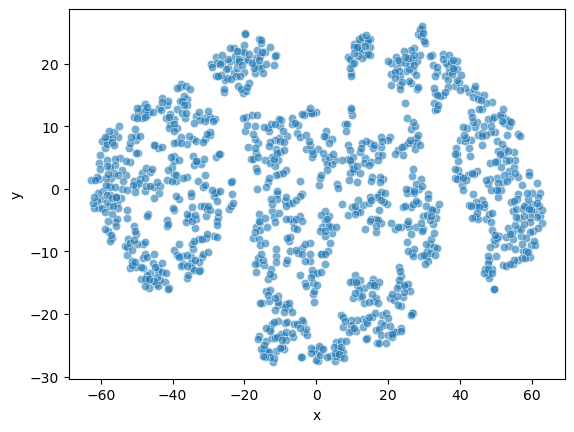

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='x', y='y', data=og, alpha=0.6,)
plt.show()

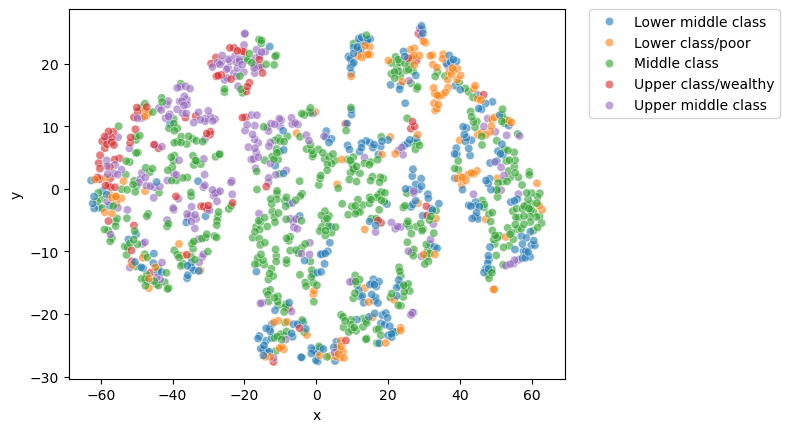

In [278]:
sns.scatterplot(x='x', y='y', hue='DEMOGRAPHIC13', data=og, alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()